In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Convert labels to one-hot encoded format
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [5]:
x_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000, 10)

In [9]:
# Define the model architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [10]:
# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/20


1875/1875 [==============================] - 9s 4ms/step - loss: 0.6329 - accuracy: 0.8289 - val_loss: 0.3134 - val_accuracy: 0.9121
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2950 - accuracy: 0.9162 - val_loss: 0.2555 - val_accuracy: 0.9268
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2432 - accuracy: 0.9309 - val_loss: 0.2253 - val_accuracy: 0.9343
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2097 - accuracy: 0.9399 - val_loss: 0.1943 - val_accuracy: 0.9427
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1848 - accuracy: 0.9467 - val_loss: 0.1773 - val_accuracy: 0.9479
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1654 - accuracy: 0.9524 - val_loss: 0.1610 - val_accuracy: 0.9533
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1493 - accuracy: 0.9574 - val_loss: 0.1481 - val_accura

In [12]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy}")

313/313 - 0s - loss: 0.0935 - accuracy: 0.9705 - 440ms/epoch - 1ms/step
Test accuracy: 0.9704999923706055


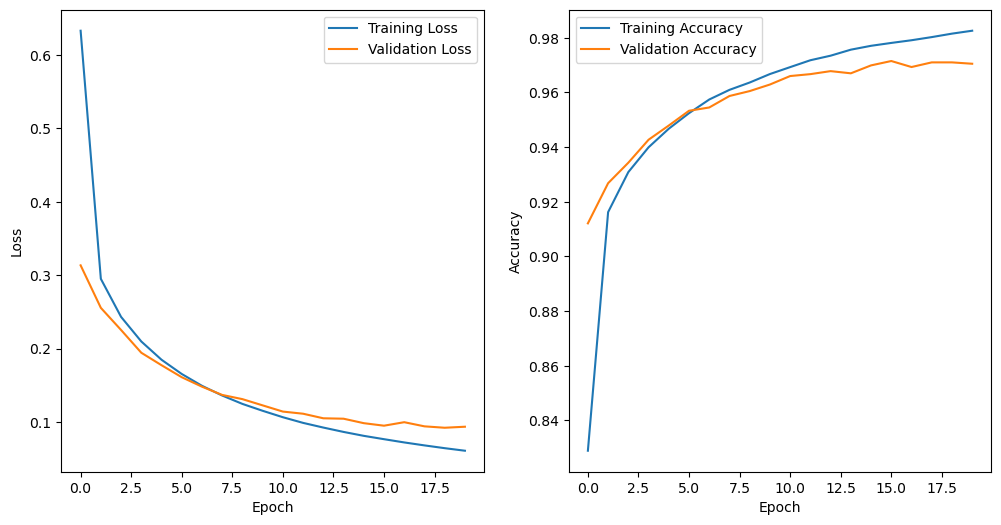

In [13]:
# Plot the training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
# Make predictions
predictions = model.predict(x_test[:5])
predicted_classes = tf.argmax(predictions, axis=1)
print(f"Predicted classes: {predicted_classes.numpy()}")


1/1 [==============================] - 0s 144ms/step
Predicted classes: [7 2 1 0 4]
